In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score

### Как должен выглядеть диплом (какие части)

**предполагаемые разделы:**
- рассказать про выбор признаков и моделей (нужен код? как предоставлять результаты исследования? показывать метрики и говорить что хорошо и плохо)

In [2]:
mark = pd.read_csv('new_marks.csv')
mark

,КодОбучения,НомерЛД,ПерваяПопытка,Итог,Пересдавал,Семестр,Дисциплина,КодПланыСтроки,Кафедра,Тип_Ведомости,Год
0,31127,10019,Отл,Отл,0,1,Оптимизирующее проектирование вычислительной т...,2091027.0,каф.ВТ,Экзамен,2023-2024
1,31127,10019,Хор,Хор,0,1,Цифровая обработка сигналов,2091013.0,каф.ВТ,Дифференцированный зачет,2023-2024
2,31127,10019,Удв,Удв,0,1,Безопасность жизнедеятельности,2090998.0,каф.БЖД,Дифференцированный зачет,2023-2024
3,31127,10019,Хор,Хор,0,1,Введение в искусственный интеллект,2091014.0,каф.ВТ,Экзамен,2023-2024
4,31127,10019,Хор,Хор,0,1,Введение в искусственный интеллект,2091014.0,каф.ВТ,К/работа,2023-2024
...,...,...,...,...,...,...,...,...,...,...,...
172196,48290,9990323,Н/я,Н/я,0,1,Иностранный язык,2098349.0,каф.ИНЯЗ,Дифференцированный зачет,2023-2024
172197,48290,9990323,Н/я,Н/я,0,1,"Зачет с оценкой по дисциплине ""Основы российск...",2106761.0,каф.ИКГП,Дифференцированный зачет,2023-2024
172198,48290,9990323,Н/я,Н/я,0,1,Инженерная графика,2098368.0,каф.ПМИГ,Дифференцированный зачет,2023-2024
172199,48290,9990323,Н/я,Н/я,0,1,Алгебра и геометрия,2098351.0,каф.АМ,Экзамен,2023-2024


In [9]:
mark = mark[['НомерЛД', 'ПерваяПопытка', 'Семестр', 'Дисциплина', 'Кафедра', 'Тип_Ведомости']]

In [3]:
visits = pd.read_csv('visits.csv')
visits

,ID ЛК,ID Предмета,title,Сезон,Год,Всего занятий,Посещений (студ.),Посещений (стар.),Отметок (стар.),Посещений (преп.),Отметок (преп.),Посещений (СКУД),Отметок (СКУД)
0,213,51,Компьютерные технологии и моделирование в элек...,autumn,2023,16,10,10,10,10,10,12,16
1,213,59,Современные проблемы электроники (Problems of ...,autumn,2023,18,2,2,10,0,4,2,16
2,213,60,Современные проблемы электроники (Problems of ...,autumn,2023,16,2,2,12,0,0,2,16
3,213,78,Русский язык как иностранный (Russian as a For...,autumn,2023,2,2,0,0,0,0,2,2
4,213,210,Основы научных исследований (Foundations of Sc...,autumn,2023,18,2,2,12,2,10,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453913,424749,4937,Экономика организации,autumn,2024,1,0,1,1,0,0,0,0
453914,424749,5074,Физкультура,autumn,2024,1,0,1,1,0,0,0,0
453915,424749,6327,Теоретические основы электротехники,autumn,2024,1,0,0,1,0,1,0,0
453916,424758,5863,Коммерциализация результатов научных исследова...,autumn,2024,1,0,0,0,0,0,0,0


In [11]:
visits['Год'].unique()

array([2023, 2024], dtype=int64)

In [13]:
visits = visits[['ID ЛК', 'title', 'Сезон', 'Год', 'Посещений (СКУД)', 'Отметок (СКУД)']]

In [17]:
visits['visit'] = (visits['Посещений (СКУД)'] / visits['Отметок (СКУД)']).fillna(0)

C:\Users\romas\AppData\Local\Temp\ipykernel_9260\3630138299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits['visit'] = (visits['Посещений (СКУД)'] / visits['Отметок (СКУД)']).fillna(0)


In [19]:
visits = visits[['ID ЛК', 'title', 'Сезон', 'Год', 'visit']]

In [5]:
st = pd.read_csv('students.csv')
st

,ID ИОТ,ID ЛК,ДР,ID Обучения (ЛК),КодОбучения (Шахты),Зачетка,НомерЛД (Шахты),Иностранец,ID Группы,Группа,Курс,Учебный год,Срок обучения,Статус,Статус.1,Гражданство,Шифр специальность,Специальность,Уровень образования,Форма образования
0,23929,424241,NaN,41530,NaN,59811,305524,False,23672,598,1,2024-2025,2,NaN,NaN,NaN,20.04.01,Техносферная безопасность,Магистратура,Очная форма
1,1305,2340,1998-8-14,33827,44035.0,293504,4090316,False,22415,2935,2,2023-2024,3,Бюджет,Учащийся,РФ,2.3,Информационные технологии и телекоммуникации,Аспирантура,Очная форма
2,1308,9870,1999-7-10,37817,48052.0,393507,2220317,False,22416,3935,1,2023-2024,3,Бюджет,Учащийся,РФ,2.3,Информационные технологии и телекоммуникации,Аспирантура,Очная форма
3,1317,2313,1999-2-8,33828,44036.0,293702,3440316,False,22355,2937,2,2023-2024,3,Бюджет,Учащийся,РФ,1.2,Компьютерные науки и информатика,Аспирантура,Очная форма
4,1319,2314,1999-3-4,33843,44059.0,293703,1080316,False,22355,2937,2,2023-2024,3,Бюджет,Учащийся,РФ,1.2,Компьютерные науки и информатика,Аспирантура,Очная форма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18625,20066,215,1989-2-18,18196,27673.0,430007,6680412,True,18042,4300,2,2019-2020,2,Контракт,Закончил,Гана,09.04.01,Информатика и вычислительная техника,Магистратура,Очная форма
18626,20067,697,1998-7-17,501,NaN,639202,4960316,False,18036,6392,4,2019-2020,4,Целевой прием,Закончил,РФ,27.03.04,Управление в технических системах,Бакалавриат,Очная форма
18627,20095,323653,1989-5-15,19098,28569.0,430012,585318,True,18042,4300,2,2019-2020,2,Контракт,Закончил,Египет,09.04.01,Информатика и вычислительная техника,Магистратура,Очная форма
18628,20097,374093,2001-12-11,20312,NaN,920409,1540219,False,18296,9204,1,2019-2020,4,Бюджет,Отчислен,РФ,11.03.04,Электроника и наноэлектроника,Бакалавриат,Очная форма


In [7]:
st = st[['ID ЛК', 'НомерЛД (Шахты)', 'Иностранец', 'Курс', 'Статус', 'Статус.1', 'Уровень образования', 'Форма образования']]

параметры модели
- номер студента (уникальный id), 
- финансирование (платная основа/бюджетная), 
- статус (учащийся, отчислен, академический отпуск), 
- форма образования (очная, очно-заочная, заочная), 
- процент посещения занятий, 
- тип ведомости (экзамен, дифференцированный зачет, курсовая, практика)
- кафедра, на которой преподается предмет


In [22]:
mark.head(3)

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости
0,10019,Отл,1,Оптимизирующее проектирование вычислительной т...,каф.ВТ,Экзамен
1,10019,Хор,1,Цифровая обработка сигналов,каф.ВТ,Дифференцированный зачет
2,10019,Удв,1,Безопасность жизнедеятельности,каф.БЖД,Дифференцированный зачет


In [28]:
mark['ПерваяПопытка'] = mark['ПерваяПопытка'].map({'Отл': 5,
                           'Хор': 4, 
                           'Удв': 3, 
                           'Н/я': 2, 
                           'Зач': 5, 
                           'Неуд': 2, 
                           'Н/з': 2})

C:\Users\romas\AppData\Local\Temp\ipykernel_9260\4218606137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mark['ПерваяПопытка'] = mark['ПерваяПопытка'].map({'Отл': 5,


In [29]:
mark

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости
0,10019,5,1,Оптимизирующее проектирование вычислительной т...,каф.ВТ,Экзамен
1,10019,4,1,Цифровая обработка сигналов,каф.ВТ,Дифференцированный зачет
2,10019,3,1,Безопасность жизнедеятельности,каф.БЖД,Дифференцированный зачет
3,10019,4,1,Введение в искусственный интеллект,каф.ВТ,Экзамен
4,10019,4,1,Введение в искусственный интеллект,каф.ВТ,К/работа
...,...,...,...,...,...,...
172196,9990323,2,1,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет
172197,9990323,2,1,"Зачет с оценкой по дисциплине ""Основы российск...",каф.ИКГП,Дифференцированный зачет
172198,9990323,2,1,Инженерная графика,каф.ПМИГ,Дифференцированный зачет
172199,9990323,2,1,Алгебра и геометрия,каф.АМ,Экзамен


In [30]:
mark.to_csv('marks.csv', index=False, encoding='utf-8')

In [31]:
visits['visit'] = visits['visit'] * 100

C:\Users\romas\AppData\Local\Temp\ipykernel_9260\1156169901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits['visit'] = visits['visit'] * 100


In [52]:
visits.rename(columns={'title': 'Дисциплина'}, inplace=True)

C:\Users\romas\AppData\Local\Temp\ipykernel_9260\3703320295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits.rename(columns={'title': 'Дисциплина'}, inplace=True)


In [53]:
visits.head(3)

,ID ЛК,Дисциплина,Сезон,Год,visit
0,213,Компьютерные технологии и моделирование в элек...,autumn,2023,75.0
1,213,Современные проблемы электроники (Problems of ...,autumn,2023,12.5
2,213,Современные проблемы электроники (Problems of ...,autumn,2023,12.5


In [33]:
visits.to_csv('visits_coef.csv', index=False, encoding='utf-8')

In [37]:
st.rename(columns={'Статус': 'finans', 'Статус.1': 'status'}, inplace=True)

C:\Users\romas\AppData\Local\Temp\ipykernel_9260\1332313240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.rename(columns={'Статус': 'finans', 'Статус.1': 'status'}, inplace=True)


In [43]:
st.rename(columns={'НомерЛД (Шахты)': 'НомерЛД'}, inplace=True)

C:\Users\romas\AppData\Local\Temp\ipykernel_9260\1072524807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.rename(columns={'НомерЛД (Шахты)': 'НомерЛД'}, inplace=True)


In [44]:
st.head(3)

,ID ЛК,НомерЛД,Иностранец,Курс,finans,status,Уровень образования,Форма образования
0,424241,305524,False,1,NaN,NaN,Магистратура,Очная форма
1,2340,4090316,False,2,Бюджет,Учащийся,Аспирантура,Очная форма
2,9870,2220317,False,1,Бюджет,Учащийся,Аспирантура,Очная форма


In [45]:
st.to_csv('student.csv', index=False, encoding='utf-8')

----

## Объединение таблиц

In [41]:
mark.head()

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости
0,10019,5,1,Оптимизирующее проектирование вычислительной т...,каф.ВТ,Экзамен
1,10019,4,1,Цифровая обработка сигналов,каф.ВТ,Дифференцированный зачет
2,10019,3,1,Безопасность жизнедеятельности,каф.БЖД,Дифференцированный зачет
3,10019,4,1,Введение в искусственный интеллект,каф.ВТ,Экзамен
4,10019,4,1,Введение в искусственный интеллект,каф.ВТ,К/работа


In [46]:
st.head()

,ID ЛК,НомерЛД,Иностранец,Курс,finans,status,Уровень образования,Форма образования
0,424241,305524,False,1,NaN,NaN,Магистратура,Очная форма
1,2340,4090316,False,2,Бюджет,Учащийся,Аспирантура,Очная форма
2,9870,2220317,False,1,Бюджет,Учащийся,Аспирантура,Очная форма
3,2313,3440316,False,2,Бюджет,Учащийся,Аспирантура,Очная форма
4,2314,1080316,False,2,Бюджет,Учащийся,Аспирантура,Очная форма


In [47]:
st_mark = pd.merge(mark, st, how='left', on='НомерЛД')

In [50]:
st_mark.head(3)

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования
0,10019,5,1,Оптимизирующее проектирование вычислительной т...,каф.ВТ,Экзамен,375051.0,False,5.0,Контракт,Учащийся,Бакалавриат,Заочная форма
1,10019,4,1,Цифровая обработка сигналов,каф.ВТ,Дифференцированный зачет,375051.0,False,5.0,Контракт,Учащийся,Бакалавриат,Заочная форма
2,10019,3,1,Безопасность жизнедеятельности,каф.БЖД,Дифференцированный зачет,375051.0,False,5.0,Контракт,Учащийся,Бакалавриат,Заочная форма


In [54]:
visits.head(3)

,ID ЛК,Дисциплина,Сезон,Год,visit
0,213,Компьютерные технологии и моделирование в элек...,autumn,2023,75.0
1,213,Современные проблемы электроники (Problems of ...,autumn,2023,12.5
2,213,Современные проблемы электроники (Problems of ...,autumn,2023,12.5


In [105]:
#df = pd.merge(st_mark, visits, how='left', on=['ID ЛК', 'Дисциплина'])

visits_2023 = visits[visits['Год'] == 2023]
visits_2024 = visits[visits['Год'] == 2024]

merged_odd = pd.merge(st_mark[st_mark['Семестр'] % 2 != 0], visits_2023, how='inner', on=['ID ЛК', 'Дисциплина'])
merged_even = pd.merge(st_mark[st_mark['Семестр'] % 2 == 0], visits_2024, how='inner', on=['ID ЛК', 'Дисциплина'])

df = pd.concat([merged_odd, merged_even], ignore_index=True)

In [107]:
visits[visits['ID ЛК'] == 375210.0]

,ID ЛК,Дисциплина,Сезон,Год,visit
31941,375210,Радиоэлектронные системы и комплексы,autumn,2023,50.000000
31942,375210,Радиоэлектронные системы и комплексы,autumn,2023,33.333333
31943,375210,Функциональная электроника,autumn,2023,43.750000
31944,375210,Основы автоматизированного проектирования анте...,autumn,2023,50.000000
31945,375210,Основы автоматизированного проектирования анте...,autumn,2023,31.250000
31946,375210,Основы автоматизированного проектирования анте...,autumn,2023,88.888889
31947,375210,Устройства сверхвысоких частот,autumn,2023,25.000000
31948,375210,Оптическая связь и обработка информации,autumn,2023,88.888889
31949,375210,Устройства сверхвысоких частот,autumn,2023,25.000000
31950,375210,Функциональная электроника,autumn,2023,0.000000


In [106]:
df

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Сезон,Год,visit
0,10119,4,9,Оптическая связь и обработка информации,каф.ТОР,Дифференцированный зачет,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,88.888889
1,10119,4,9,Оптическая связь и обработка информации,каф.ТОР,Дифференцированный зачет,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,16.000000
2,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,50.000000
3,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,31.250000
4,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286621,9960323,3,2,Физика,каф.Физики,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,71.428571
286622,9960323,3,2,Физика,каф.Физики,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,57.142857
286623,9960323,3,2,Физика,каф.Физики,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,92.307692
286624,9960323,2,2,Математический анализ,каф.АМ,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,71.428571


In [89]:
df = df[df['Форма образования'] == 'Очная форма']

In [90]:
df = df[df['status'] == 'Учащийся']

In [99]:
df.isna().sum()

НомерЛД                  0
ПерваяПопытка            0
Семестр                  0
Дисциплина               0
Кафедра                245
Тип_Ведомости            0
ID ЛК                    0
Иностранец               0
Курс                     0
finans                   0
status                   0
Уровень образования      0
Форма образования        0
Сезон                    0
Год                      0
visit                    0
dtype: int64

In [92]:
df

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Сезон,Год,visit
5,10119,4,9,Оптическая связь и обработка информации,каф.ТОР,Дифференцированный зачет,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023.0,88.888889
6,10119,4,9,Оптическая связь и обработка информации,каф.ТОР,Дифференцированный зачет,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023.0,16.000000
7,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023.0,50.000000
8,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023.0,31.250000
9,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023.0,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354379,9960323,4,2,Программирование,каф.АПУ,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024.0,20.000000
354380,9960323,4,2,Программирование,каф.АПУ,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024.0,66.666667
354381,9960323,4,2,Программирование,каф.АПУ,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024.0,57.142857
354382,9960323,2,2,Математический анализ,каф.АМ,Экзамен,419081.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024.0,71.428571


In [104]:
df[df['visit'].isna()]

,НомерЛД,ПерваяПопытка,Семестр,Кафедра,Тип_Ведомости,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Год,visit


In [98]:
df.to_csv('dataset.csv', index=False)

In [108]:
result = df.groupby(
    ['НомерЛД', 'ПерваяПопытка', 'Семестр', 'Дисциплина', 'Кафедра', 
     'Тип_Ведомости', 'ID ЛК', 'Иностранец', 'Курс', 
     'finans', 'status', 'Уровень образования', 'Форма образования', 'Сезон', 'Год'],
    as_index=False
)['visit'].mean()

In [109]:
result

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Сезон,Год,visit
0,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963
1,10119,2,10,Антенны сверхвысоких частот,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,spring,2024,29.166667
2,10119,3,9,Основы автоматизированного проектирования анте...,каф.ТОР,К/проект,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963
3,10119,3,9,Радиоэлектронные системы и комплексы,каф.РС,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,41.666667
4,10119,3,9,Устройства сверхвысоких частот,каф.ТОР,К/работа,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134658,10280323,3,2,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,57.142857
134659,10280323,4,1,Иностранный язык,каф.ИНЯЗ,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,autumn,2023,73.333333
134660,10280323,4,2,Информационные технологии,каф.САПР,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,spring,2024,3.571429
134661,10280323,5,1,Физическая культура и спорт,каф.ФВиС,Дифференцированный зачет,404501.0,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,autumn,2023,66.666667


In [176]:
result.to_csv('dataset_ok.csv', index=False)

**можено делить по**
- семестрам 1-2, 3-4
- по сезону осень-весна (179к и 180к)

In [179]:
df = result[['НомерЛД', 'ПерваяПопытка', 'Семестр', 'Кафедра', 'Тип_Ведомости', 'Иностранец', 'Курс', 'finans', 'status', 'Уровень образования', 'Форма образования', 'Год', 'visit']].copy()

In [112]:
df['Форма образования'].unique()

array(['Очная форма', 'Очно-заочная', 'Заочная форма'], dtype=object)

In [180]:
df

,НомерЛД,ПерваяПопытка,Семестр,Кафедра,Тип_Ведомости,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Год,visit
0,10119,2,9,каф.ТОР,Экзамен,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,2023,56.712963
1,10119,2,10,каф.ТОР,Экзамен,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,2024,29.166667
2,10119,3,9,каф.ТОР,К/проект,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,2023,56.712963
3,10119,3,9,каф.РС,Экзамен,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,2023,41.666667
4,10119,3,9,каф.ТОР,К/работа,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,2023,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134658,10280323,3,2,каф.ИНЯЗ,Дифференцированный зачет,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,2024,57.142857
134659,10280323,4,1,каф.ИНЯЗ,Дифференцированный зачет,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,2023,73.333333
134660,10280323,4,2,каф.САПР,Дифференцированный зачет,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,2024,3.571429
134661,10280323,5,1,каф.ФВиС,Дифференцированный зачет,False,1.0,Контракт,Учащийся,Бакалавриат,Очная форма,2023,66.666667


In [149]:
df = pd.get_dummies(df)

### делим выборку на тренировочную и тестовую по году - тренировочная 2023 / тестовая 2024

In [ ]:
X_train = df[df['Год'] == 2023].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_train = df[df['Год'] == 2023]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[df['Год'] == 2024].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_test = df[df['Год'] == 2024]['ПерваяПопытка'].reset_index(drop=True)

In [163]:
X_train = df[df['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_train = df[df['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True)

X_test = df[df['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_test = df[df['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True)

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7844589366640875
Classification Report:
              precision    recall  f1-score   support

           2       0.22      0.24      0.23      1185
           3       0.88      0.87      0.87      7862

    accuracy                           0.78      9047
   macro avg       0.55      0.55      0.55      9047
weighted avg       0.80      0.78      0.79      9047



In [137]:
# X_train

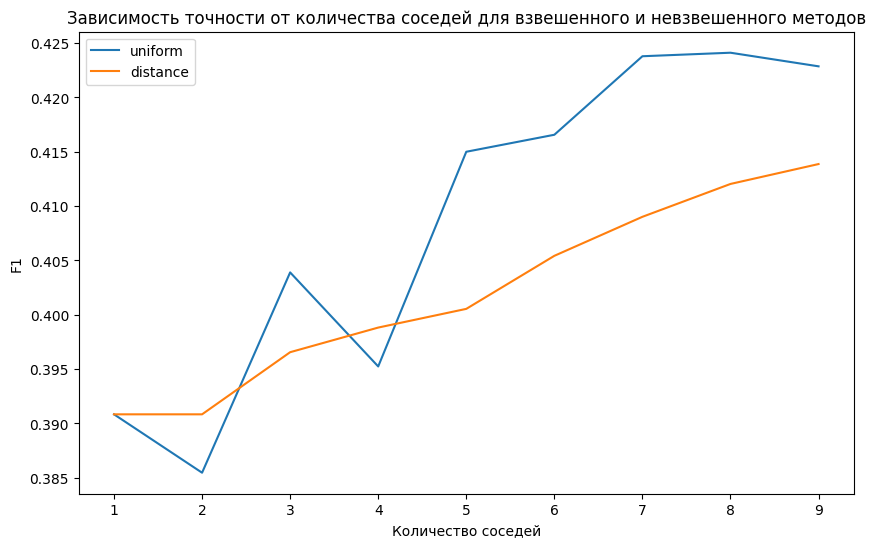

In [164]:
neighbors = list(range(1, 10))
weights = ['uniform', 'distance']

accuracies = {'uniform': [], 'distance': []}

for weight in weights:
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = f1_score(y_test, y_pred, average='weighted')
        accuracies[weight].append(acc)

plt.figure(figsize=(10, 6))
for weight in weights:
    plt.plot(neighbors, accuracies[weight], label=weight)
plt.xlabel('Количество соседей')
plt.ylabel('F1')
plt.title('Зависимость точности от количества соседей для взвешенного и невзвешенного методов')
plt.legend()
plt.show()

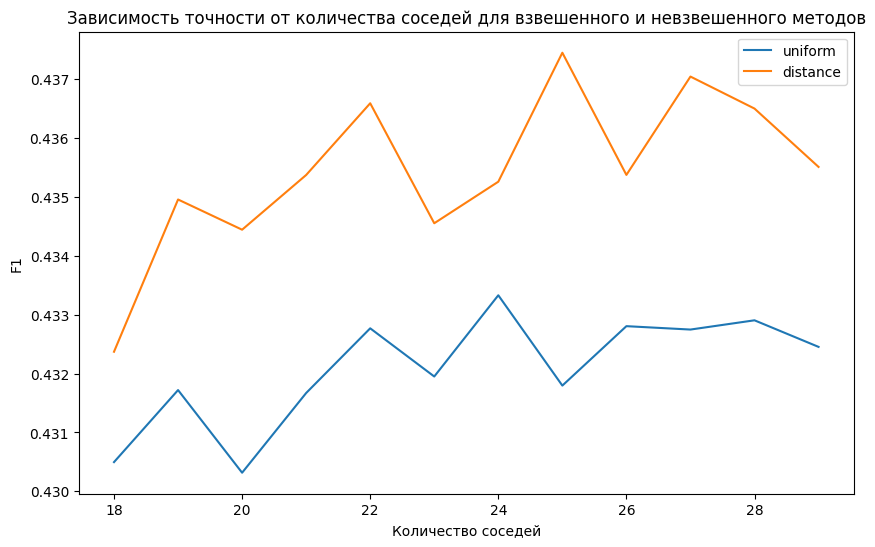

In [162]:
neighbors = list(range(18, 30))
weights = ['uniform', 'distance']

accuracies = {'uniform': [], 'distance': []}

for weight in weights:
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = f1_score(y_test, y_pred, average='weighted')
        accuracies[weight].append(acc)

plt.figure(figsize=(10, 6))
for weight in weights:
    plt.plot(neighbors, accuracies[weight], label=weight)
plt.xlabel('Количество соседей')
plt.ylabel('F1')
plt.title('Зависимость точности от количества соседей для взвешенного и невзвешенного методов')
plt.legend()
plt.show()


In [167]:
X_train = df[df['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_train = df[df['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

X_test = df[df['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_test = df[df['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

In [168]:
y_test

0        3
1        3
2        3
3        3
4        3
        ..
34262    2
34263    2
34264    3
34265    3
34266    3
Name: ПерваяПопытка, Length: 34267, dtype: int64

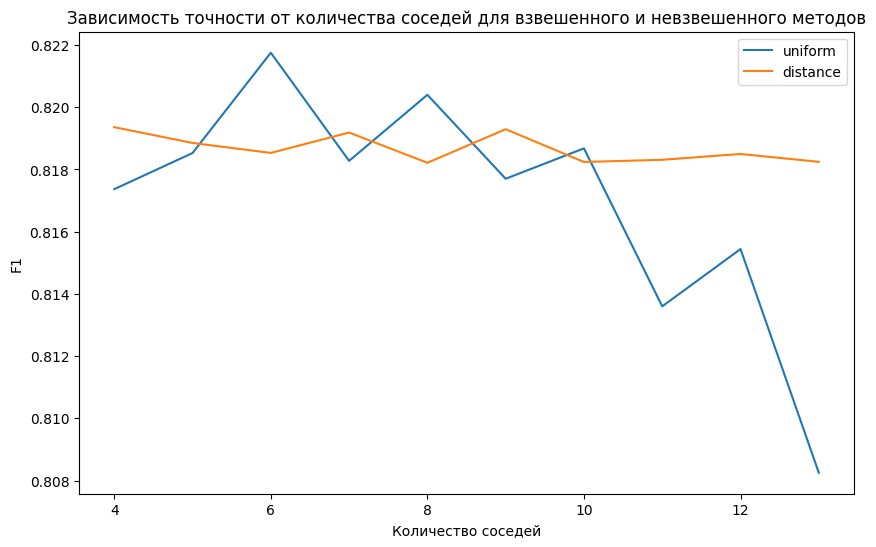

In [170]:
neighbors = list(range(4, 14))
weights = ['uniform', 'distance']

accuracies = {'uniform': [], 'distance': []}

for weight in weights:
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = f1_score(y_test, y_pred, average='weighted')
        accuracies[weight].append(acc)

plt.figure(figsize=(10, 6))
for weight in weights:
    plt.plot(neighbors, accuracies[weight], label=weight)
plt.xlabel('Количество соседей')
plt.ylabel('F1')
plt.title('Зависимость точности от количества соседей для взвешенного и невзвешенного методов')
plt.legend()
plt.show()

In [171]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8451863308722678

In [172]:
def conf_matrix(y_test, y_pred, class_names):
    confmat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=class_names)
    disp.plot(cmap='viridis')
    plt.grid(False)
    plt.title('Матрица ошибок')
    plt.show()

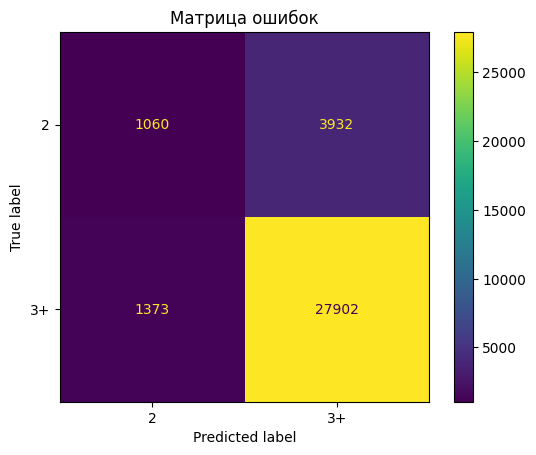

In [173]:
class_names = ['2', '3+'] 
conf_matrix(y_test, y_pred, class_names)

In [175]:
df

,НомерЛД,ПерваяПопытка,Семестр,Иностранец,Курс,Год,visit,Кафедра_Баз.каф.ВТ,Кафедра_Баз.каф.ИИТ,Кафедра_Баз.каф.КТЭА,...,status_Академический,status_Закончил,status_Отчислен,status_Учащийся,Уровень образования_Бакалавриат,Уровень образования_Магистратура,Уровень образования_Специалитет,Форма образования_Заочная форма,Форма образования_Очная форма,Форма образования_Очно-заочная
0,10119,2,9,True,5.0,2023,56.712963,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,10119,2,10,True,5.0,2024,29.166667,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,10119,3,9,True,5.0,2023,56.712963,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,10119,3,9,True,5.0,2023,41.666667,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,10119,3,9,True,5.0,2023,25.000000,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134658,10280323,3,2,False,1.0,2024,57.142857,0,0,0,...,0,0,0,1,1,0,0,0,1,0
134659,10280323,4,1,False,1.0,2023,73.333333,0,0,0,...,0,0,0,1,1,0,0,0,1,0
134660,10280323,4,2,False,1.0,2024,3.571429,0,0,0,...,0,0,0,1,1,0,0,0,1,0
134661,10280323,5,1,False,1.0,2023,66.666667,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [184]:
r = df.groupby(['НомерЛД', 'Кафедра'], as_index=False).agg({
    'ПерваяПопытка': 'mean', # среднее значение
    'Семестр': 'first',
    'Тип_Ведомости': 'first',
    'Иностранец': 'first',
    'Курс': 'first',
    'finans': 'sum',
    'status': 'first',
    'Уровень образования': 'first',
    'Форма образования': 'first',
    'Год': 'first',
    'visit': 'sum'
})

r['ПерваяПопытка'] = r['ПерваяПопытка'].round().astype(int)

r = pd.get_dummies(r)

X_train = r[r['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_train = r[r['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

X_test = r[r['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
y_test = r[r['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})


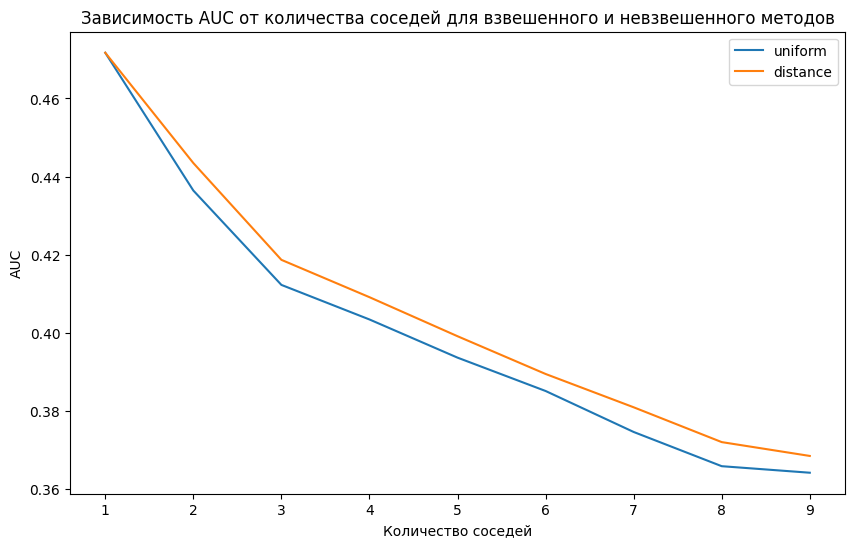

In [206]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Предполагается, что X_train, y_train, X_test и y_test уже определены

neighbors = list(range(1, 10))
weights = ['uniform', 'distance']

# Для AUC нужно будет создать словарь для хранения значений
auc_scores = {'uniform': [], 'distance': []}

# Бинаризация меток классов
y_train_bin = label_binarize(y_train, classes=[2, 3])  # Предположим, что классы: 2 и 3
y_test_bin = label_binarize(y_test, classes=[2, 3])

for weight in weights:
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn.fit(X_train, y_train)
        y_pred_proba = knn.predict_proba(X_test)  # Получаем вероятности для каждого класса
        auc = roc_auc_score(y_test_bin[:, 0], y_pred_proba[:, 0])  # Используем только класс 2
        auc_scores[weight].append(auc)

plt.figure(figsize=(10, 6))
for weight in weights:
    plt.plot(neighbors, auc_scores[weight], label=weight)
plt.xlabel('Количество соседей')
plt.ylabel('AUC')
plt.title('Зависимость AUC от количества соседей для взвешенного и невзвешенного методов')
plt.legend()
plt.show()


In [207]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.7076378910135956

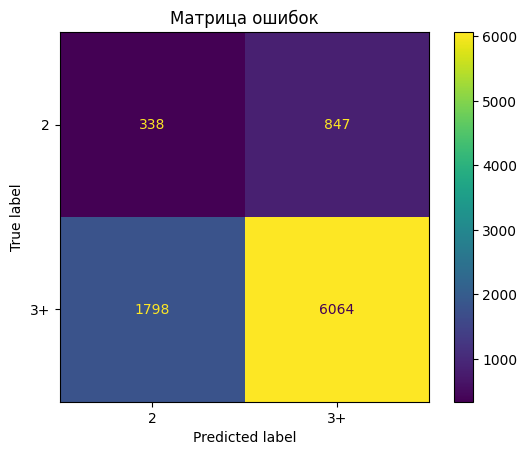

In [208]:
class_names = ['2', '3+'] 
conf_matrix(y_test, y_pred, class_names)

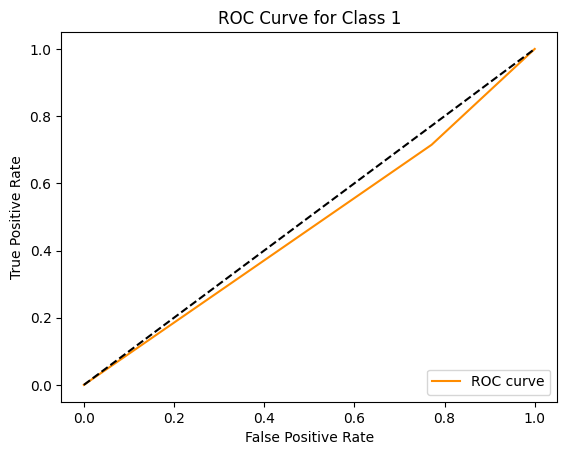

In [212]:
y_proba_class = y_pred

# метки для класса (1 - рассматриваемый класс, 0 - все остальные классы)
y_true_class = [1 if y == 2 else 0 for y in y_test]

# значения ROC-кривой
fpr, tpr, _ = roc_curve(y_true_class, y_proba_class)


plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1')
plt.legend(loc="lower right")
plt.show()

-----
# исселодвание (прод)
---

In [3]:
def processing(df):
    result = df.groupby(
        ['НомерЛД', 'ПерваяПопытка', 'Семестр', 'Дисциплина', 'Кафедра', 
         'Тип_Ведомости', 'ID ЛК', 'Иностранец', 'Курс', 
         'finans', 'status', 'Уровень образования', 'Форма образования', 'Сезон', 'Год'],
        as_index=False
    )['visit'].mean()
    
    return result

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
res = processing(df)
res.head()

,НомерЛД,ПерваяПопытка,Семестр,Дисциплина,Кафедра,Тип_Ведомости,ID ЛК,Иностранец,Курс,finans,status,Уровень образования,Форма образования,Сезон,Год,visit
0,10119,2,9,Основы автоматизированного проектирования анте...,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963
1,10119,2,10,Антенны сверхвысоких частот,каф.ТОР,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,spring,2024,29.166667
2,10119,3,9,Основы автоматизированного проектирования анте...,каф.ТОР,К/проект,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,56.712963
3,10119,3,9,Радиоэлектронные системы и комплексы,каф.РС,Экзамен,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,41.666667
4,10119,3,9,Устройства сверхвысоких частот,каф.ТОР,К/работа,375210.0,True,5.0,Бюджет,Учащийся,Специалитет,Очная форма,autumn,2023,25.000000


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def auc_visualization(X_train, y_train, X_test, y_test):
    neighbors = list(range(1, 20))
    weights = ['uniform', 'distance']

    auc_scores = {'uniform': [], 'distance': []}

    # Бинаризация меток классов
    y_train_bin = label_binarize(y_train, classes=[2, 3])  # классы: 2 и 3
    y_test_bin = label_binarize(y_test, classes=[2, 3])

    for weight in weights:
        for k in neighbors:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
            knn.fit(X_train, y_train)
            y_pred_proba = knn.predict_proba(X_test)  # Получаем вероятности для каждого класса
            auc = roc_auc_score(y_test_bin[:, 0], y_pred_proba[:, 0])  # Используем только класс 2
            auc_scores[weight].append(auc)

    plt.figure(figsize=(10, 6))
    for weight in weights:
        plt.plot(neighbors, auc_scores[weight], label=weight)
    plt.xlabel('Количество соседей')
    plt.ylabel('AUC')
    plt.title('Зависимость AUC от количества соседей для взвешенного и невзвешенного методов')
    plt.legend()
    plt.show()

## ПАРАМЕТРЫ
df.groupby(['НомерЛД', 'Кафедра', 'Год', 'Семестр']
'ПерваяПопытка': 'min', # среднее
        'Тип_Ведомости': 'first',
        'Иностранец': 'first',
        'Курс': 'first',
        'finans': 'first',
        'status': 'first',
        'Уровень образования': 'first',
        'Форма образования': 'first',
        'visit': 'median'

In [9]:
def make_dataset(df):
    r = df.groupby(['НомерЛД', 'Кафедра', 'Год', 'Семестр'], as_index=False).agg({
        'ПерваяПопытка': 'min', # среднее
        'Тип_Ведомости': 'first',
        'Иностранец': 'first',
        'Курс': 'first',
        'finans': 'first',
        'status': 'first',
        'Уровень образования': 'first',
        'Форма образования': 'first',
        'visit': 'median'
    })

    r['ПерваяПопытка'] = r['ПерваяПопытка'].round().astype(int)

    r = pd.get_dummies(r)

    X_train = r[r['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_train = r[r['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

    X_test = r[r['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_test = r[r['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3}) 
    
    return X_train, y_train, X_test, y_test

In [10]:
X_train, y_train, X_test, y_test = make_dataset(res)

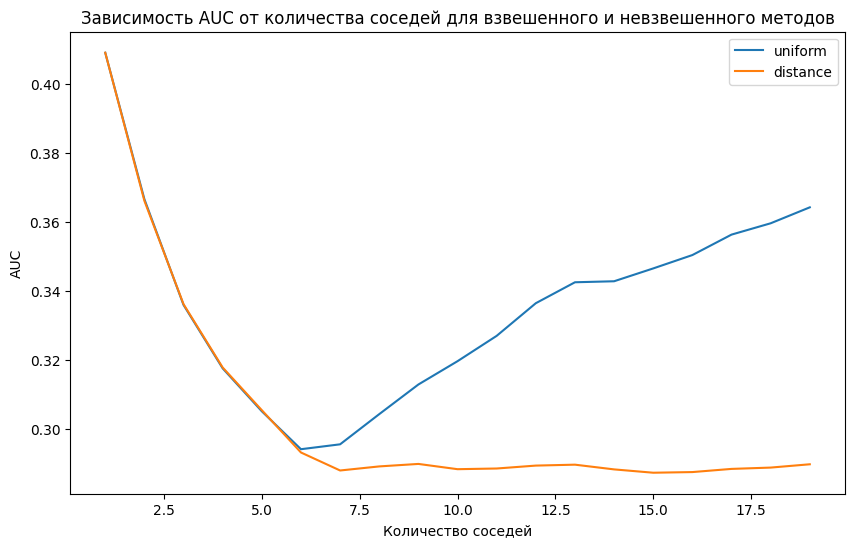

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

neighbors = list(range(1, 20))
weights = ['uniform', 'distance']

# Для AUC нужно будет создать словарь для хранения значений
auc_scores = {'uniform': [], 'distance': []}

# Бинаризация меток классов
y_train_bin = label_binarize(y_train, classes=[2, 3])  # Предположим, что классы: 2 и 3
y_test_bin = label_binarize(y_test, classes=[2, 3])

for weight in weights:
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn.fit(X_train, y_train)
        y_pred_proba = knn.predict_proba(X_test)  # Получаем вероятности для каждого класса
        auc = roc_auc_score(y_test_bin[:, 0], y_pred_proba[:, 0])  # Используем только класс 2
        auc_scores[weight].append(auc)

plt.figure(figsize=(10, 6))
for weight in weights:
    plt.plot(neighbors, auc_scores[weight], label=weight)
plt.xlabel('Количество соседей')
plt.ylabel('AUC')
plt.title('Зависимость AUC от количества соседей для взвешенного и невзвешенного методов')
plt.legend()
plt.show()

In [15]:
X_train.head(5)

,НомерЛД,Год,Семестр,Иностранец,Курс,visit,Кафедра_Баз.каф.ВТ,Кафедра_Баз.каф.ИИТ,Кафедра_Баз.каф.КТЭА,Кафедра_Баз.каф.ОЭ,...,status_Академический,status_Закончил,status_Отчислен,status_Учащийся,Уровень образования_Бакалавриат,Уровень образования_Магистратура,Уровень образования_Специалитет,Форма образования_Заочная форма,Форма образования_Очная форма,Форма образования_Очно-заочная
0,10123,2023,1,False,1.0,88.051471,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,10123,2023,1,False,1.0,97.058824,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,10123,2023,1,False,1.0,87.500000,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,10123,2023,1,False,1.0,63.480392,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,10123,2023,1,False,1.0,9.090909,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [17]:
X_test.head(5)

,НомерЛД,Год,Семестр,Иностранец,Курс,visit,Кафедра_Баз.каф.ВТ,Кафедра_Баз.каф.ИИТ,Кафедра_Баз.каф.КТЭА,Кафедра_Баз.каф.ОЭ,...,status_Академический,status_Закончил,status_Отчислен,status_Учащийся,Уровень образования_Бакалавриат,Уровень образования_Магистратура,Уровень образования_Специалитет,Форма образования_Заочная форма,Форма образования_Очная форма,Форма образования_Очно-заочная
0,10123,2024,2,False,1.0,63.690476,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,10123,2024,2,False,1.0,75.000000,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,10123,2024,2,False,1.0,94.444444,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,10123,2024,2,False,1.0,73.373016,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,10123,2024,2,False,1.0,87.053571,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


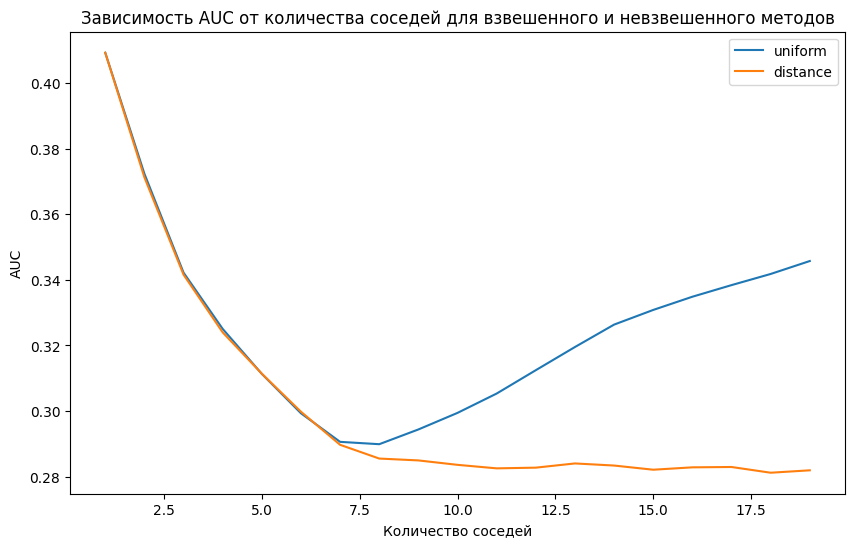

In [30]:
def make_dataset(df):
    r = df.groupby(['НомерЛД', 'Кафедра', 'Тип_Ведомости', 'Семестр'], as_index=False).agg({
        'ПерваяПопытка': 'min', # среднее
        #'Иностранец': 'first',
        'Курс': 'first',
        'finans': 'first',
        # 'status': 'first',
        # 'Уровень образования': 'first',
        # 'Форма образования': 'first',
        'visit': 'median'
    })

    r['ПерваяПопытка'] = r['ПерваяПопытка'].round().astype(int)

    r = pd.get_dummies(r)

    X_train = r[r['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_train = r[r['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

    X_test = r[r['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_test = r[r['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3}) 
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = make_dataset(res)
auc_visualization(X_train, y_train, X_test, y_test)

In [26]:
 X_train

,НомерЛД,Семестр,Курс,visit,Кафедра_Баз.каф.ВТ,Кафедра_Баз.каф.ИИТ,Кафедра_Баз.каф.КТЭА,Кафедра_Баз.каф.ОЭ,Кафедра_Баз.каф.ПАО ГИС,Кафедра_ИК,...,Кафедра_каф.ЭТП,Кафедра_каф.ЭТПТ,Кафедра_каф.ЭУТ,Тип_Ведомости_Дифференцированный зачет,Тип_Ведомости_К/проект,Тип_Ведомости_К/работа,Тип_Ведомости_Экзамен,finans_Бюджет,finans_Контракт,finans_Целевой прием
0,10123,1,1.0,88.051471,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,10123,1,1.0,97.058824,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,10123,1,1.0,87.500000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,10123,1,1.0,63.480392,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,10123,1,1.0,9.090909,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,10280323,1,1.0,49.986559,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
19382,10280323,1,1.0,49.986559,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
19383,10280323,1,1.0,66.666667,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
19384,10280323,1,1.0,84.166667,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8189215280650944

In [32]:
def conf_matrix(y_test, y_pred, class_names = ['2', '3+']):
    confmat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=class_names)
    disp.plot(cmap='viridis')
    plt.grid(False)
    plt.title('Матрица ошибок')
    plt.show()

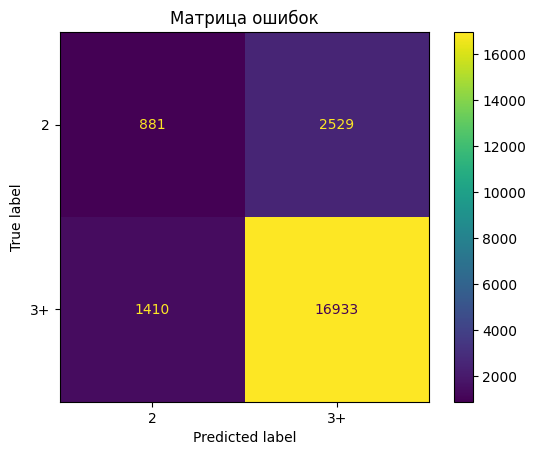

In [33]:
conf_matrix(y_test, y_pred)

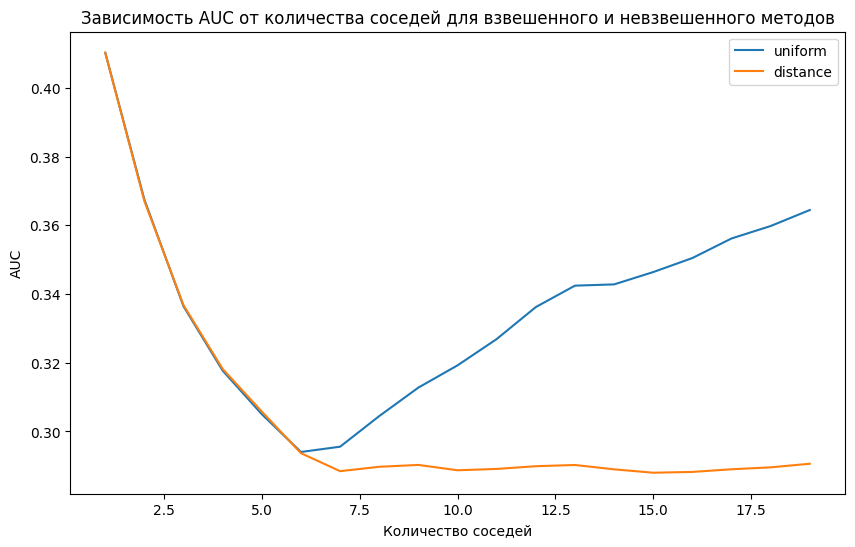

In [34]:
def make_dataset(df):
    r = df.groupby(['НомерЛД', 'Кафедра', 'Семестр'], as_index=False).agg({
        'ПерваяПопытка': 'min', #
        #'Иностранец': 'first',
        'Курс': 'first',
        'finans': 'first',
        # 'status': 'first',
        # 'Уровень образования': 'first',
        # 'Форма образования': 'first',
        'visit': 'median'
    })

    r['ПерваяПопытка'] = r['ПерваяПопытка'].round().astype(int)

    r = pd.get_dummies(r)

    X_train = r[r['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_train = r[r['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

    X_test = r[r['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_test = r[r['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3}) 
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = make_dataset(res)
auc_visualization(X_train, y_train, X_test, y_test)


In [36]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8025663277956856

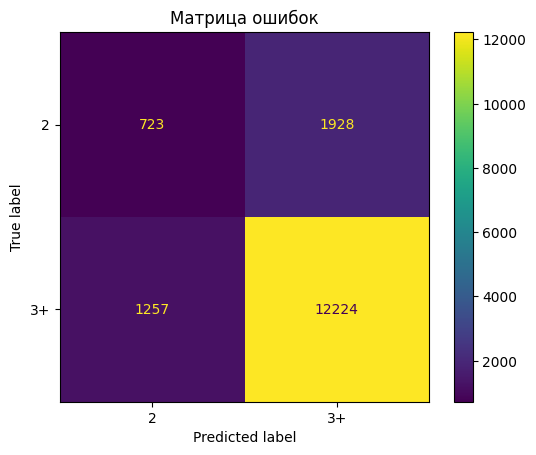

In [37]:
conf_matrix(y_test, y_pred)

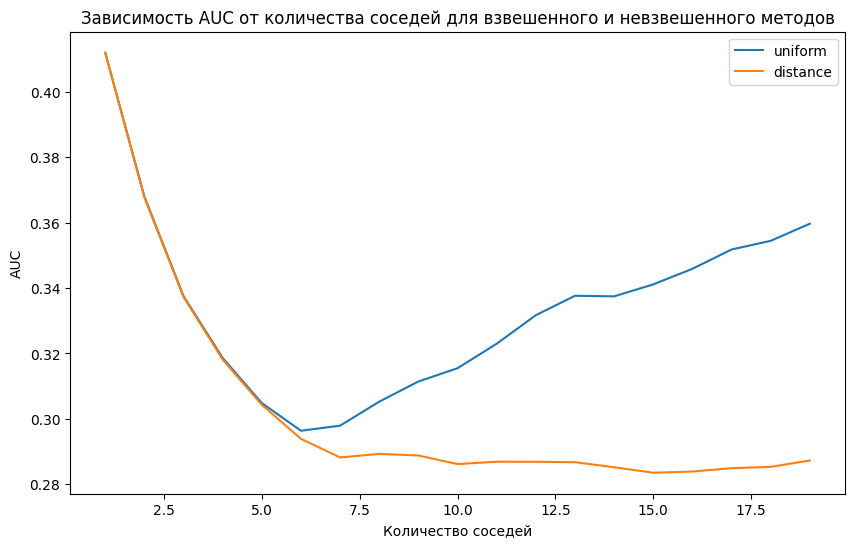

In [38]:
def make_dataset(df):
    r = df.groupby(['НомерЛД', 'Кафедра', 'Семестр'], as_index=False).agg({
        'ПерваяПопытка': 'median', #
        #'Иностранец': 'first',
        'Курс': 'first',
        'finans': 'first',
        # 'status': 'first',
        # 'Уровень образования': 'first',
        # 'Форма образования': 'first',
        'visit': 'median'
    })

    r['ПерваяПопытка'] = r['ПерваяПопытка'].round().astype(int)

    r = pd.get_dummies(r)

    X_train = r[r['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_train = r[r['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

    X_test = r[r['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_test = r[r['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3}) 
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = make_dataset(res)
auc_visualization(X_train, y_train, X_test, y_test)

0.8179394991321597


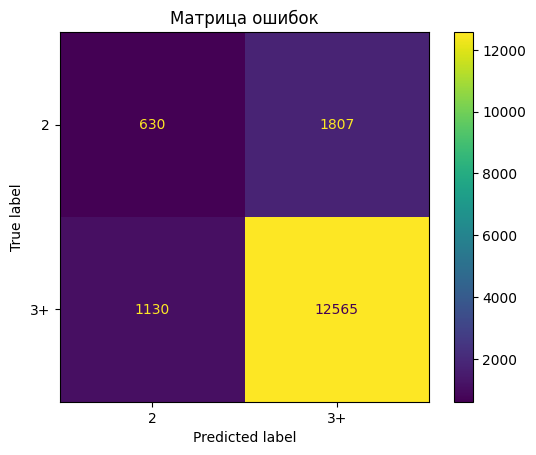

In [39]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
conf_matrix(y_test, y_pred)

In [46]:
X_train[X_train['Курс'] == 4].count()

НомерЛД                    6
Семестр                    6
Курс                       6
visit                      6
Кафедра_Баз.каф.ВТ         6
Кафедра_Баз.каф.ИИТ        6
Кафедра_Баз.каф.КТЭА       6
Кафедра_Баз.каф.ОЭ         6
Кафедра_Баз.каф.ПАО ГИС    6
Кафедра_ИК                 6
Кафедра_каф.АМ             6
Кафедра_каф.АПУ            6
Кафедра_каф.БЖД            6
Кафедра_каф.БТС            6
Кафедра_каф.ВМ             6
Кафедра_каф.ВТ             6
Кафедра_каф.ИБ             6
Кафедра_каф.ИЗОС           6
Кафедра_каф.ИИСТ           6
Кафедра_каф.ИКГП           6
Кафедра_каф.ИМ             6
Кафедра_каф.ИНЯЗ           6
Кафедра_каф.ИС             6
Кафедра_каф.КСУ            6
Кафедра_каф.ЛИНС           6
Кафедра_каф.МВЭ            6
Кафедра_каф.МИТ            6
Кафедра_каф.МНЭ            6
Кафедра_каф.МОЭВМ          6
Кафедра_каф.МСК            6
Кафедра_каф.ПМИГ           6
Кафедра_каф.ПЭ             6
Кафедра_каф.РАПС           6
Кафедра_каф.РС             6
Кафедра_каф.РЭ

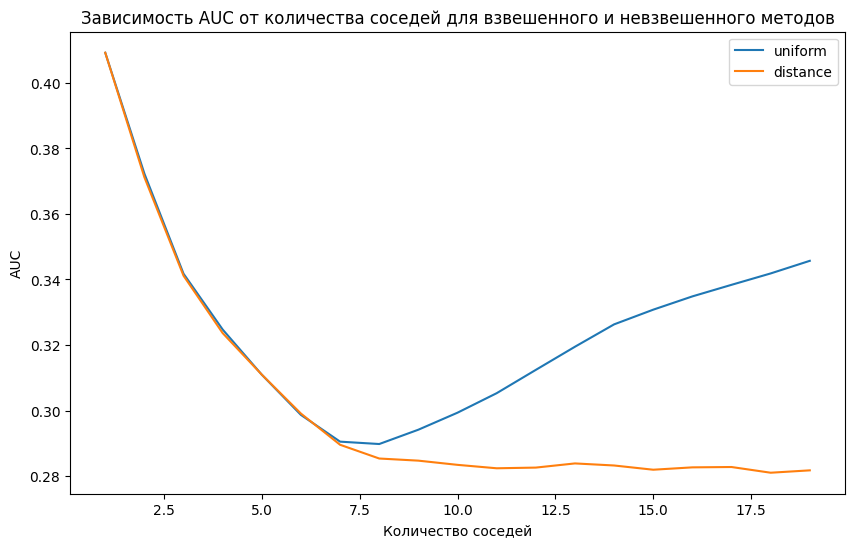

In [72]:
def make_dataset(df):
    r = df.groupby(['НомерЛД', 'Кафедра','Тип_Ведомости', 'Семестр'], as_index=False).agg({
        'ПерваяПопытка': 'min', #
        'Иностранец': 'first',
        'Курс': 'first',
        'finans': 'first',
        'status': 'first',
        'Уровень образования': 'first',
        # 'Форма образования': 'first',
        'visit': 'median'
    })

    #r['ПерваяПопытка'] = r['ПерваяПопытка'].round().astype(int)
    r['ПерваяПопытка'] = np.floor(r['ПерваяПопытка']).astype(int)
    
    r = pd.get_dummies(r)

    X_train = r[r['Семестр'] == 1].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_train = r[r['Семестр'] == 1]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})

    X_test = r[r['Семестр'] == 2].drop('ПерваяПопытка', axis=1).reset_index(drop=True)
    y_test = r[r['Семестр'] == 2]['ПерваяПопытка'].reset_index(drop=True).map({2: 2, 3: 3, 4: 3, 5: 3})
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = make_dataset(res)
auc_visualization(X_train, y_train, X_test, y_test)

In [73]:
#def conf_matrix(y_test, y_pred, class_names = ['2', '3', '4', '5']):
def conf_matrix(y_test, y_pred, class_names = ['2', '3+']):
    confmat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=class_names)
    disp.plot(cmap='viridis')
    plt.grid(False)
    plt.title('Матрица ошибок')
    plt.show()

0.8399760952512297


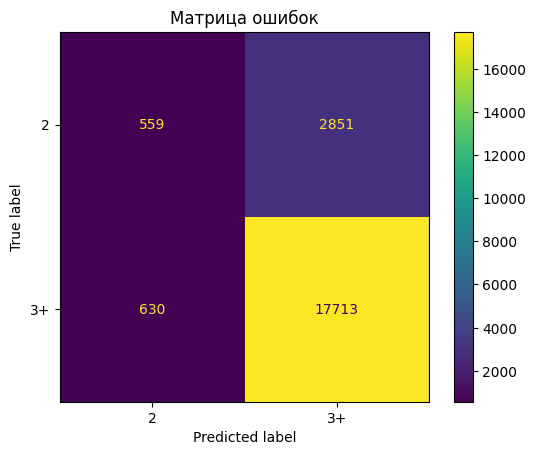

In [74]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
conf_matrix(y_test, y_pred)